# House Sales in King County, USA

##### Author: Fridah Kimathi


<img src="images\King_county_houses.jpeg" alt="A picture of houses in King County, USA" width="600" height="400">


# **Business Understanding**
    
The project aims to aid a Real Estate Agency in King county, Washington-USA predict the house prices for single-family homes that their potential clients are looking buy and/or sell. The business problem the project aims to tackle is to highlight the main influential factors affecting a home's value in King county, Washington-USA. 

### **Importing the required libraries**

In [1]:
# importing pandas for data wrangling and manipulation
import pandas as pd

# importing matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# numpy for numerical operation and arrays
import numpy as np

#### **Loading the data**

In [2]:
kc_df = pd.read_csv("data/kc_house_data.csv")

# **Data Understanding**

The dataset used in the project highlights the house sales in King County, USA in the years 2014 and 2015. The relevant features in the dataset used for analysis and modeling in this project are; house id, house price, number of bedrooms and bathrooms, size of living space and property, number of floors the house has, the condition and grade of the house according to the King County System and the year the house was built.
The dataset has 21597 data entries.

>           More explanation required

In [3]:
# All the columns in the King County dataset
kc_df.columns



Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
# Dropping irrelevant columns 
irrelevant_columns = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] 
kc_new_df = kc_df.drop(irrelevant_columns, axis=1)

In [5]:
#Previewing the first seven rows of kc_new_df 
kc_new_df.head(7)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,2001
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1995


In [6]:
# Checking for the shape, column names and data types 
kc_new_df.info()
    # The data has 21597 rows and 11 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  float64
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


In [7]:
# Statistical summary of the dataframe 
kc_new_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


 - Observations from the  Statistical summary of the dataframe:
  
    <ol type='i'> <li> Waterfront column's data is presented in binary format. From the research done, 1 represents homes with a waterfront view and 0 represents homes without waterfront view </li> 
    <li>Condition is arranged from 1 to 5. According to <a href="https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r"> King County Property Info website </a> condition is relative to age and grade and is coded as follows; <ul>
     <li> 1 represents Poor- Worn out</li>
     <li> 2 represents Fair- Badly worn </li> 
     <li> 3 represents Average </li> 
     <li> 4 represents Good </li> 
     <li> 5 represents Very Good. </li> 
     </ul> 
      </li>
    <li>Grade ranges from 3 to 13 in the dataset. According to <a href="https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r"> King County Property Info website </a> Grade represents the construction quality of improvements. Grades run from grade 1 to 13 and are generally defined as; <ul>
     <li> 1-3: Falls short of minimum building standards. </li>
     <li> 4: Generally older, low quality construction. Does not meet code.</li> 
     <li> 5: Low construction costs and workmanship. Small, simple design. </li> 
     <li> 6: Lowest grade currently meeting building code. Low quality materials and simple designs. </li> 
     <li> 7: Average grade of construction and design. Commonly seen in plats and older sub-divisions. </li> 
     <li> 8: Just above average in construction and design. Usually better materials in both the exterior and interior finish work. </li> 
     <li> 9: Better architectural design with extra interior and exterior design and quality </li> 
     <li> 10: 10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage. </li> 
     <li> 11: Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.</li> 
     <li> 12: Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
    </li>
    <li> 13: Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc </li>
    </ul>
      </li>
    <li> Houses in the dataset were built between 1900 and 2015.</li>
</ol>

# **Data Preparation**

 #### **1. Identifying and dealing with duplicates**
<ul type='square'><li>Checking for duplicates using the column 'id' </li> <ul>

In [8]:
kc_new_df[kc_new_df['id'].duplicated(keep=False)]

# The data has two duplicates

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
93,6021501535,430000.0,3,1.50,1580,5000,1.0,0.0,3,8,1939
94,6021501535,700000.0,3,1.50,1580,5000,1.0,0.0,3,8,1939
313,4139480200,1380000.0,4,3.25,4290,12103,1.0,0.0,3,11,1997
314,4139480200,1400000.0,4,3.25,4290,12103,1.0,0.0,3,11,1997
324,7520000520,232000.0,2,1.00,1240,12092,1.0,NaN,3,6,1922
...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,502000.0,4,2.50,2680,5539,2.0,NaN,3,8,2013
20763,6300000226,240000.0,4,1.00,1200,2171,1.5,0.0,3,7,1933
20764,6300000226,380000.0,4,1.00,1200,2171,1.5,0.0,3,7,1933
21564,7853420110,594866.0,3,3.00,2780,6000,2.0,0.0,3,9,2013


 - Dropping the above duplicates while keeping the entry with the least number of null values was achieved by:
  
    <ol type='i'> <li> Creating a new column called 'Number_missing' that has the count of the number of missing values per row.</li> 
    <li>Arranged that new column by ascending order and the price column in descending. </li>
    <li>Dropped duplicates using the 'id' column and kept the first entry which has the least number of null values or the highest price. </li>
    <li> Dropped the columns 'Number_missing' and 'id' since they are no longer required in the dataframe</li>
</ol>

In [9]:
kc_new_df = kc_new_df.assign(Number_missing = kc_new_df.isnull().sum(1))\
              .sort_values(by=['Number_missing', 'price'], ascending=[True, False])\
              .drop_duplicates(subset=['id'], keep='first')\
              .drop(['Number_missing', 'id'], axis=1).copy()
kc_new_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
7245,7700000.0,6,8.00,12050,27600,2.5,0.0,4,13,1910
3910,7060000.0,5,4.50,10040,37325,2.0,1.0,3,11,1940
9245,6890000.0,6,7.75,9890,31374,2.0,0.0,3,13,2001
4407,5570000.0,5,5.75,9200,35069,2.0,0.0,3,13,2001
1446,5350000.0,5,5.00,8000,23985,2.0,0.0,3,12,2009


In [10]:
# Confirming that the duplicates have been removed
kc_new_df.duplicated().sum()

5

 #### **2. Identifying and dealing with missing values**
 <ul type='square'><li>Created a function to print out column(s) with missing data in the dataframe. </li> <ul>

In [11]:
def column_missing_values(data):
    
    """A function to check for missing values"""

    missing_data = {column:data[column].isnull().sum() for column in data.columns  if data[column].isnull().sum()}
    return(missing_data)

In [12]:
column_missing_values(kc_new_df)

{'waterfront': 2333}

In [13]:
# Replacing null values in the waterfront column with 0
kc_new_df['waterfront'] = kc_new_df['waterfront'].replace(np.NaN, 0)

In [14]:
# Confirming the missing values in the waterfront column have been replaced and the data has no more missing values
column_missing_values(kc_new_df)

{}

 #### **3. Data Type Conversion**

In [15]:
# Checking column data types
kc_new_df.dtypes

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
waterfront     float64
condition        int64
grade            int64
yr_built         int64
dtype: object

In [16]:
# The waterfront column should be int, either 1,0
# Changing the data type for waterfront column from float to int
kc_new_df['waterfront'] = kc_new_df['waterfront'].astype('int64')

In [17]:
# Converting the datatype of the 'yr_built' column from int64 to int32
# This will allow the correct output to be displayed when the datatype is converted to datetime64[ns]

#kc_new_df['yr_built'].astype('int32')

# Converting the datatype from int32 to datetime64[ns]

#kc_new_df['yr_built'] = pd.to_datetime(kc_new_df['yr_built'], format = '%Y')

In [18]:
# Confirming that all data types have been changed.
kc_new_df.dtypes

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
waterfront       int64
condition        int64
grade            int64
yr_built         int64
dtype: object

 #### **4. Checking for and removing multicolinearity**

In [19]:
kc_new_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
price,1.000000,0.309567,0.525293,0.701285,0.088822,0.255069,0.264901,0.034217,0.666889,0.051116
bedrooms,0.309567,1.000000,0.515383,0.579069,0.032490,0.177734,-0.002205,0.025893,0.357988,0.155241
bathrooms,0.525293,0.515383,1.000000,0.755522,0.087779,0.501803,0.063635,-0.129362,0.665587,0.506252
sqft_living,0.701285,0.579069,0.755522,1.000000,0.172586,0.352868,0.104737,-0.061677,0.762477,0.316646
sqft_lot,0.088822,0.032490,0.087779,0.172586,1.000000,-0.005561,0.021429,-0.009169,0.113656,0.052312
floors,0.255069,0.177734,0.501803,0.352868,-0.005561,1.000000,0.020578,-0.266859,0.458091,0.488935
waterfront,0.264901,-0.002205,0.063635,0.104737,0.021429,0.020578,1.000000,0.016608,0.082905,-0.024842
condition,0.034217,0.025893,-0.129362,-0.061677,-0.009169,-0.266859,0.016608,1.000000,-0.150508,-0.365129
grade,0.666889,0.357988,0.665587,0.762477,0.113656,0.458091,0.082905,-0.150508,1.000000,0.446235
yr_built,0.051116,0.155241,0.506252,0.316646,0.052312,0.488935,-0.024842,-0.365129,0.446235,1.000000


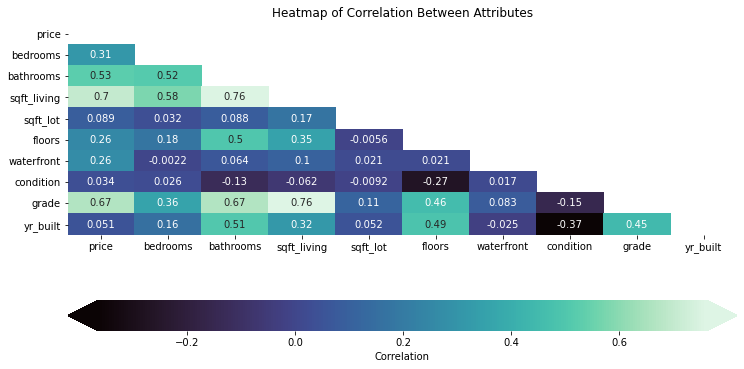

In [20]:
# df with the correlation matrix
kc_data_corr = kc_new_df.corr()

# Setting up the figure and axes
fig, ax = plt.subplots(figsize=(12,6))

# Plotting a heatmap of the correlation matrix(kc_data_corr), with both numbers and colors indicating the correlations
sns.heatmap(
    # Specifying the data to be plotted
    data = kc_data_corr,

    # The mask is used to ensure duplicates are not shown
    mask=np.triu(np.ones_like(kc_data_corr, dtype=bool)),

    # Specifying the that the existing axes (ax) should be used
    ax=ax,
     # Specifying that the labels should be shown too.
    annot=True,
     
     # Customizing the  colorbar appearance
    cmap="mako",
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
    
)
# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes");

**_Observations_**:
 <ul type='square'> 
   <li> sqft_living and price have a high correlation of 0.7</li>
    <li>(bathrooms and sqft_living) and (Grade and sqft_living) and  are highly correlated with a correlation of 0.76 each. </li>
    <li>Due to multicolinearity in each pair of features above, one of the features in each pair has to be dropped. Hence, bathrooms and Grade are dropped from the dataset due to their multicolinearity with sqft_living.</li>
 </ul>

In [21]:
# Dropping bathroom and grade columns from the dataframe
kc_new_df = kc_new_df.drop(['bathrooms', 'grade'], axis=1).copy()

# Previewing the last 5 rows of the data
kc_new_df.tail()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built
5298,99000.0,2,960,8236,1.0,0,2,1948
10758,92000.0,2,760,5500,1.5,0,3,1947
12539,90000.0,2,790,2640,1.0,0,3,1973
16184,81000.0,2,730,9975,1.0,0,1,1943
465,80000.0,1,430,5050,1.0,0,2,1912


 #### **5. Normalizing the numeric data**

In [22]:
# The continuous numerical columns are;
continuous_columns = ['price', 'sqft_living', 'sqft_lot']

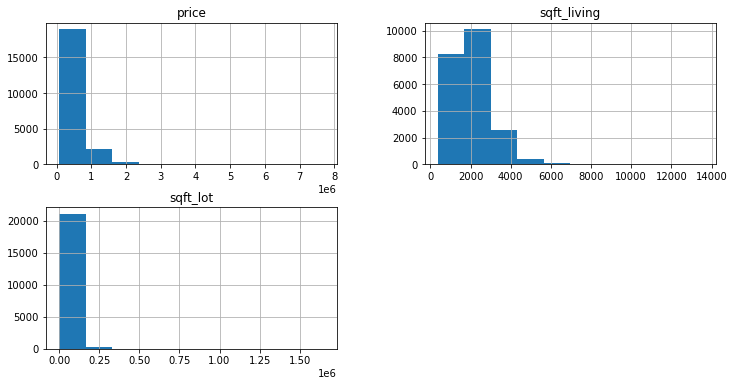

In [23]:
# Histogram showing the distribution of the continuous columns
kc_new_df[continuous_columns].hist(figsize=(12,6));

In [24]:
# Log transformation on continuous features to reduce skewness and data variablility
kc_new_df[continuous_columns] = np.log(kc_new_df[continuous_columns])

In [25]:
#Standardizing the continuous columns
#Function for normalization
def normalize(cont_column):
    return(cont_column - cont_column.mean())/ cont_column.std()

# Calling thee normalization function
kc_new_df[continuous_columns] = kc_new_df[continuous_columns].apply(normalize)

# Preview of the first two columns of the dataframe
kc_new_df.head(2)

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built
7245,5.351411,6,4.350157,1.367361,2.5,0,4,1910
3910,5.185846,5,3.919810,1.701317,2.0,1,3,1940


In [26]:

#Renaming the columns names to indicate columns that have undergone log transformation
kc_new_df.columns =  [f'{column_name}_log' if column_name in continuous_columns else column_name for column_name in kc_new_df.columns ]

# Preview of the first two columns of the dataframe
kc_new_df.head(2)

,price_log,bedrooms,sqft_living_log,sqft_lot_log,floors,waterfront,condition,yr_built
7245,5.351411,6,4.350157,1.367361,2.5,0,4,1910
3910,5.185846,5,3.919810,1.701317,2.0,1,3,1940


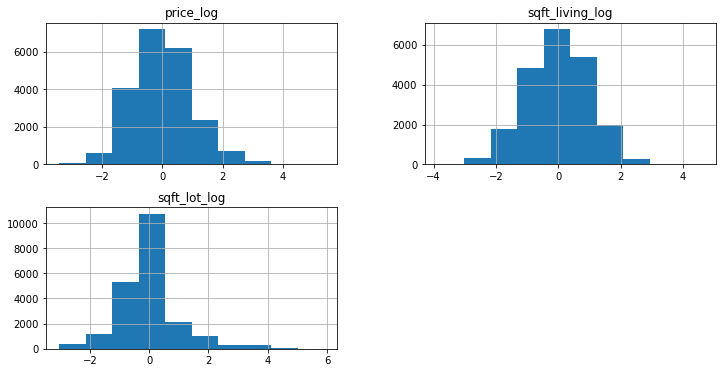

In [29]:
kc_new_df[['price_log', 'sqft_living_log','sqft_lot_log']].hist(figsize=(12,6));

# **Modelling**